In [1]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# train and test data load
train_dt=pd.read_csv('train.csv')
test_dt=pd.read_csv('test.csv')

In [3]:
train_dt.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
test_dt.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [5]:
print('shapes of train data', train_dt.shape)
print('shapes of test data', test_dt.shape)

shapes of train data (103904, 25)
shapes of test data (25976, 25)


In [6]:
train_dt.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
test_dt.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


# Combine the train and test data

In [8]:
data=pd.concat([train_dt,test_dt],axis=0)
data.sample(5)

Unnamed: 0      id Gender      Customer Type  Age   Type of Travel  \
19039       19039  104361   Male     Loyal Customer   42  Business travel   
9969         9969   72934   Male     Loyal Customer   46  Business travel   
3081         3081   69770   Male     Loyal Customer   31  Business travel   
59445       59445  116691   Male  disloyal Customer   24  Business travel   
10763       10763   97631   Male     Loyal Customer   27  Business travel   

          Class  Flight Distance  Inflight wifi service  \
19039  Business              452                      4   
9969   Business             3033                      4   
3081   Business             2454                      1   
59445  Business              333                      5   
10763       Eco              748                      1   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
19039                                  4  ...                       5   
9969                                   4  ...                       3   
3081                                   1  ...                       4   
59445                                  0  ...                       5   
10763                                  3  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
19039                 5                 5                 5                5   
9969                  2                 5                 5                4   
3081                  5                 5                 4                5   
59445                 5                 5                 5                4   
10763                 2                 2                 4                4   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
19039                 5            3                           0   
9969                  5            4                         243   
3081                  3            5                          14   
59445                 4            5                           3   
10763                 3            1                          65   

       Arrival Delay in Minutes             satisfaction  
19039                      15.0                satisfied  
9969                      244.0                satisfied  
3081                        5.0                satisfied  
59445                       0.0                satisfied  
10763                      46.0  neutral or dissatisfied  

[5 rows x 25 columns]

In [9]:
print(data.shape)

(129880, 25)


In [10]:
# missing values after combining test and train data:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [11]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# A) 1

## 3 Univariate graphs:

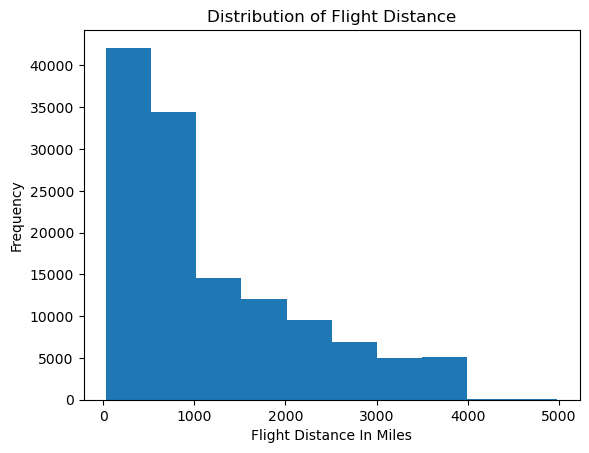

In [12]:
plt.hist(data['Flight Distance'])
plt.xlabel('Flight Distance In Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Distance')
plt.show()

The graph above is showing the Flight distance that how much disatance had a flight.

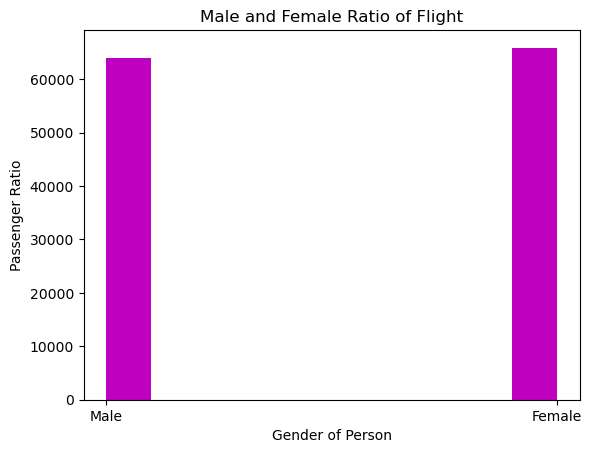

In [13]:
plt.hist(data['Gender'],color=['m'])
plt.xlabel('Gender of Person')
plt.ylabel('Passenger Ratio')
plt.title('Male and Female Ratio of Flight')
plt.show()

This the graph above is describing the Ratio of gender with respect to passengers. That the how many Male and Females are there in flight

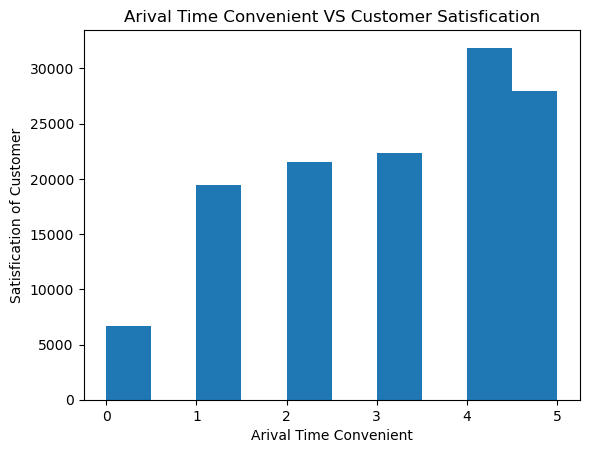

In [14]:
plt.hist(data['Departure/Arrival time convenient'])
plt.xlabel('Arival Time Convenient')
plt.ylabel('Satisfication of Customer')
plt.title('Arival Time Convenient VS Customer Satisfication')
plt.show()

This graph is showing the time convenience with respect to customers satisfication that customers are satisfied with flight perfect time not.

# A) 2

## 3 Bivariate Graphs

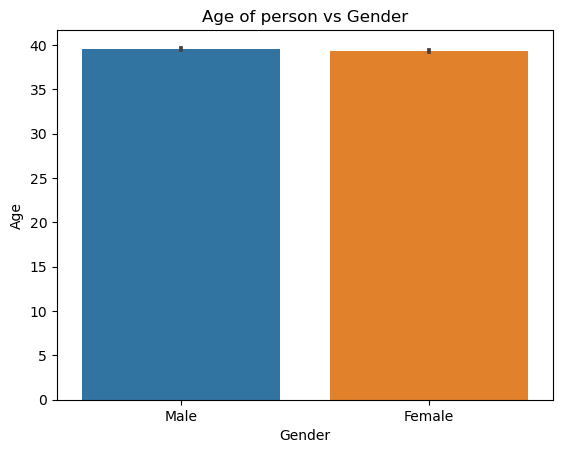

In [15]:
sns.barplot(x='Gender', y='Age', data=data)
plt.title('Age of person vs Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

This the graph above is showing the Gender of person with respect to age of person means what's the age of peoples that travels and ratio of gender that either male person age is more or female person. 

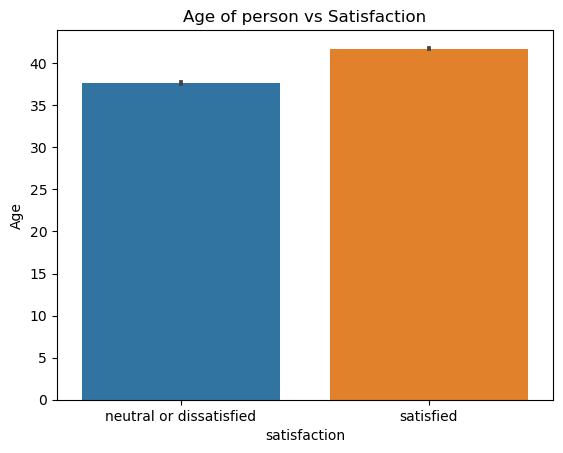

In [16]:
sns.barplot(x='satisfaction', y='Age', data=data)
plt.title('Age of person vs Satisfaction')
plt.xlabel('satisfaction')
plt.ylabel('Age')
plt.show()

Above graph is basically showing the satisfication of person with respect to age. how many male and females were satisfied or not and what age of person has satisfication.

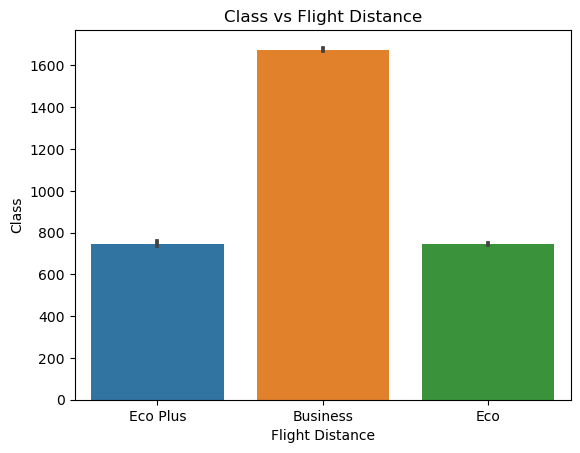

In [17]:
sns.barplot(x='Class', y='Flight Distance', data=data)
plt.title('Class vs Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Class')
plt.show()

This graph is showing that the what is the class of flight that were covering the distance.

# A) 3

# Discriptive Statistics:

# Statistical Measurements

In [18]:
data.describe().T

count          mean           std   min  \
Unnamed: 0                         129880.0  44158.700000  31207.377062   0.0   
id                                 129880.0  64940.500000  37493.270818   1.0   
Age                                129880.0     39.427957     15.119360   7.0   
Flight Distance                    129880.0   1190.316392    997.452477  31.0   
Inflight wifi service              129880.0      2.728696      1.329340   0.0   
Departure/Arrival time convenient  129880.0      3.057599      1.526741   0.0   
Ease of Online booking             129880.0      2.756876      1.401740   0.0   
Gate location                      129880.0      2.976925      1.278520   0.0   
Food and drink                     129880.0      3.204774      1.329933   0.0   
Online boarding                    129880.0      3.252633      1.350719   0.0   
Seat comfort                       129880.0      3.441361      1.319289   0.0   
Inflight entertainment             129880.0      3.358077      1.334049   0.0   
On-board service                   129880.0      3.383023      1.287099   0.0   
Leg room service                   129880.0      3.350878      1.316252   0.0   
Baggage handling                   129880.0      3.632114      1.180025   1.0   
Checkin service                    129880.0      3.306267      1.266185   0.0   
Inflight service                   129880.0      3.642193      1.176669   0.0   
Cleanliness                        129880.0      3.286326      1.313682   0.0   
Departure Delay in Minutes         129880.0     14.713713     38.071126   0.0   
Arrival Delay in Minutes           129487.0     15.091129     38.465650   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         16234.75  38963.5  71433.25  103903.0  
id                                 32470.75  64940.5  97410.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    844.0   1744.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

# A) 4
# Heatmap of features

In [19]:
corelation=data.corr().T
corelation

C:\Users\Data Science\AppData\Local\Temp\ipykernel_5140\1411386858.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=data.corr().T


Unnamed: 0        id       Age  \
Unnamed: 0                           1.000000  0.002199  0.000109   
id                                   0.002199  1.000000  0.020322   
Age                                  0.000109  0.020322  1.000000   
Flight Distance                      0.001160  0.095504  0.099459   
Inflight wifi service               -0.001320 -0.023096  0.016116   
Departure/Arrival time convenient    0.002141 -0.002192  0.036960   
Ease of Online booking               0.001388  0.013400  0.022565   
Gate location                        0.003799 -0.000113 -0.000398   
Food and drink                      -0.004171 -0.000510  0.023194   
Online boarding                     -0.000912  0.055538  0.207572   
Seat comfort                        -0.001724  0.052164  0.159136   
Inflight entertainment               0.000485  0.001620  0.074947   
On-board service                     0.000170  0.055502  0.057078   
Leg room service                     0.003046  0.044088  0.039119   
Baggage handling                    -0.000626  0.074569 -0.047991   
Checkin service                     -0.004747  0.079325  0.033475   
Inflight service                    -0.001990  0.078793 -0.051347   
Cleanliness                         -0.001083  0.024048  0.052565   
Departure Delay in Minutes           0.002358 -0.017643 -0.009041   
Arrival Delay in Minutes             0.002099 -0.035657 -0.011248   

                                   Flight Distance  Inflight wifi service  \
Unnamed: 0                                0.001160              -0.001320   
id                                        0.095504              -0.023096   
Age                                       0.099459               0.016116   
Flight Distance                           1.000000               0.006701   
Inflight wifi service                     0.006701               1.000000   
Departure/Arrival time convenient        -0.018914               0.344915   
Ease of Online booking                    0.065165               0.714807   
Gate location                             0.005520               0.338573   
Food and drink                            0.057066               0.132214   
Online boarding                           0.214825               0.457445   
Seat comfort                              0.157662               0.121513   
Inflight entertainment                    0.130507               0.207802   
On-board service                          0.111194               0.119928   
Leg room service                          0.134533               0.160317   
Baggage handling                          0.064855               0.120376   
Checkin service                           0.073608               0.043762   
Inflight service                          0.059316               0.110029   
Cleanliness                               0.095648               0.131300   
Departure Delay in Minutes                0.002402              -0.015946   
Arrival Delay in Minutes                 -0.001935              -0.017749   

                                   Departure/Arrival time convenient  \
Unnamed: 0                                                  0.002141   
id                                                         -0.002192   
Age                                                         0.036960   
Flight Distance                                            -0.018914   
Inflight wifi service                                       0.344915   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.437620   
Gate location                                               0.447510   
Food and drink                                              0.000687   
Online boarding                                             0.072287   
Seat comfort                                                0.008666   
Inflight entertainment                                     -0.008380   
On-board service               

<Axes: >

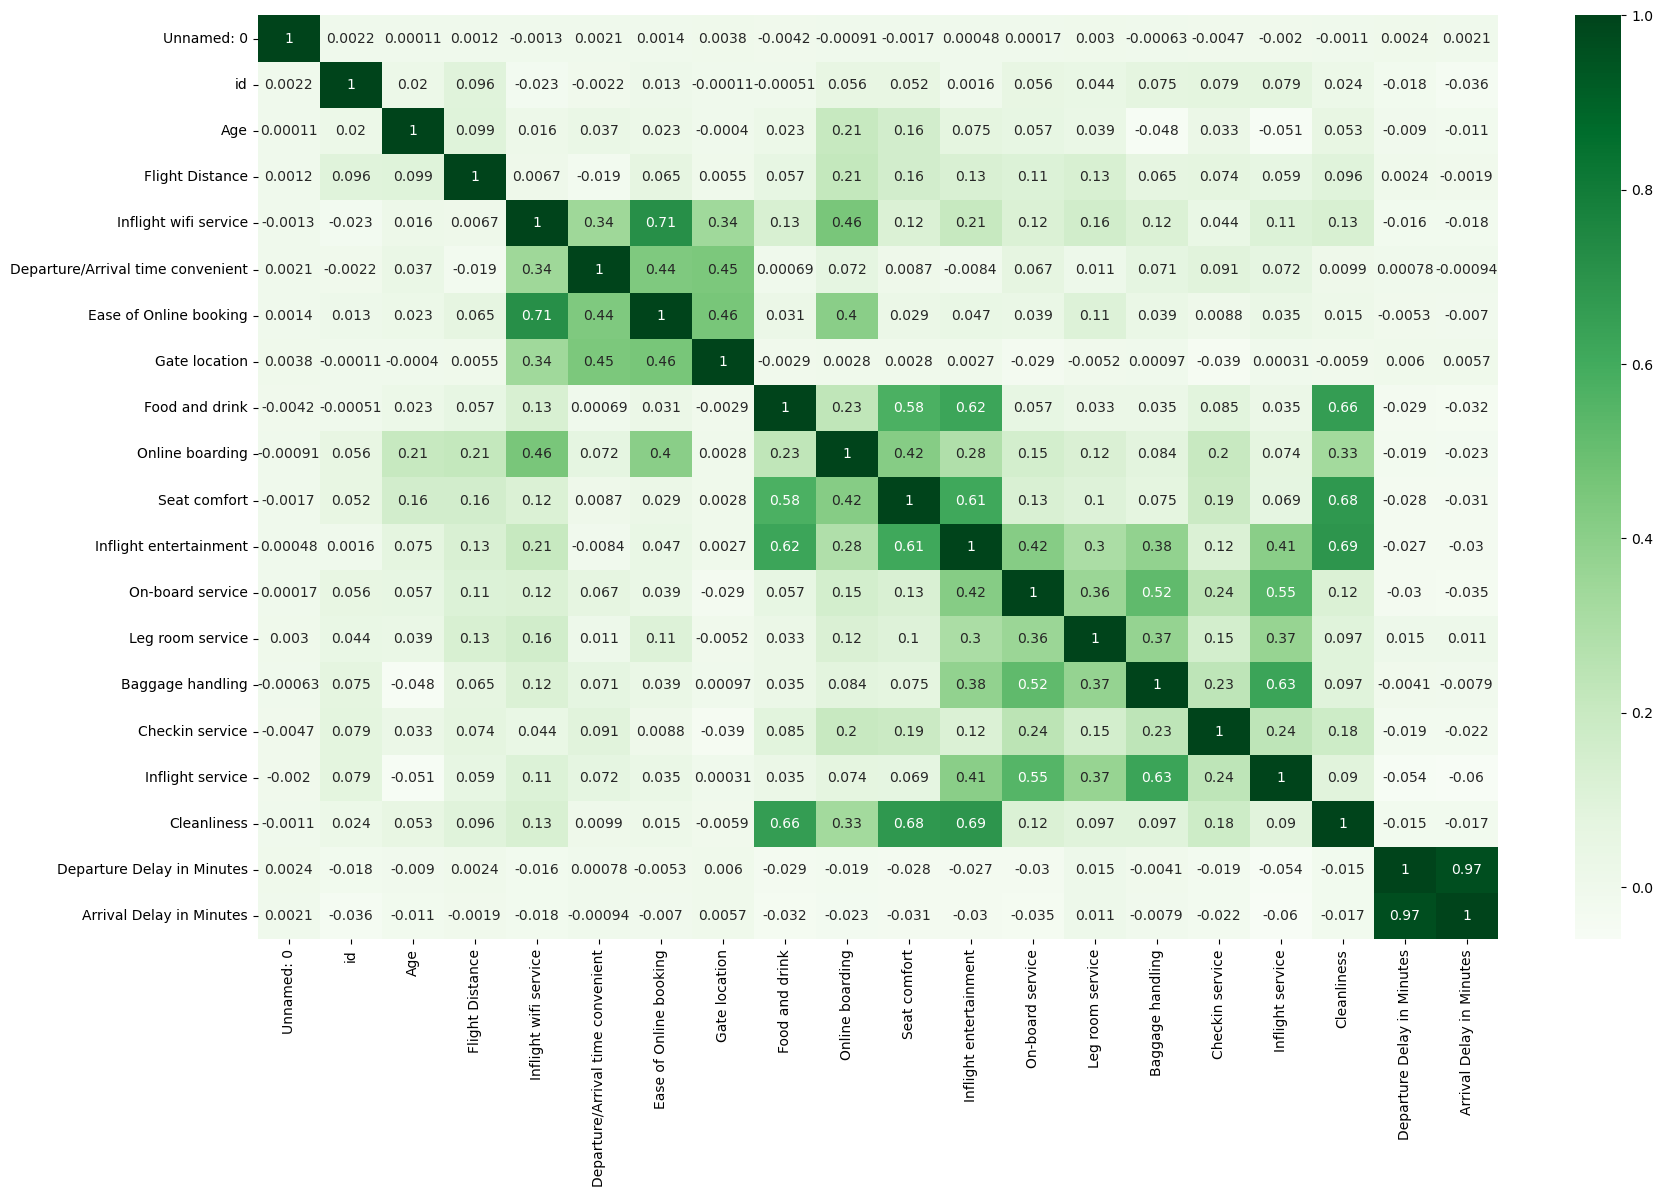

In [20]:
# heatmap
plt.figure(figsize=(20,12))
sns.heatmap(corelation,annot=True, cmap='Greens')

This graph is showing the Correlation of features with each other. Means which feature is correlated with other features.

# A) 5
# plot the missig values:

In [21]:
missed_value=data.isnull()

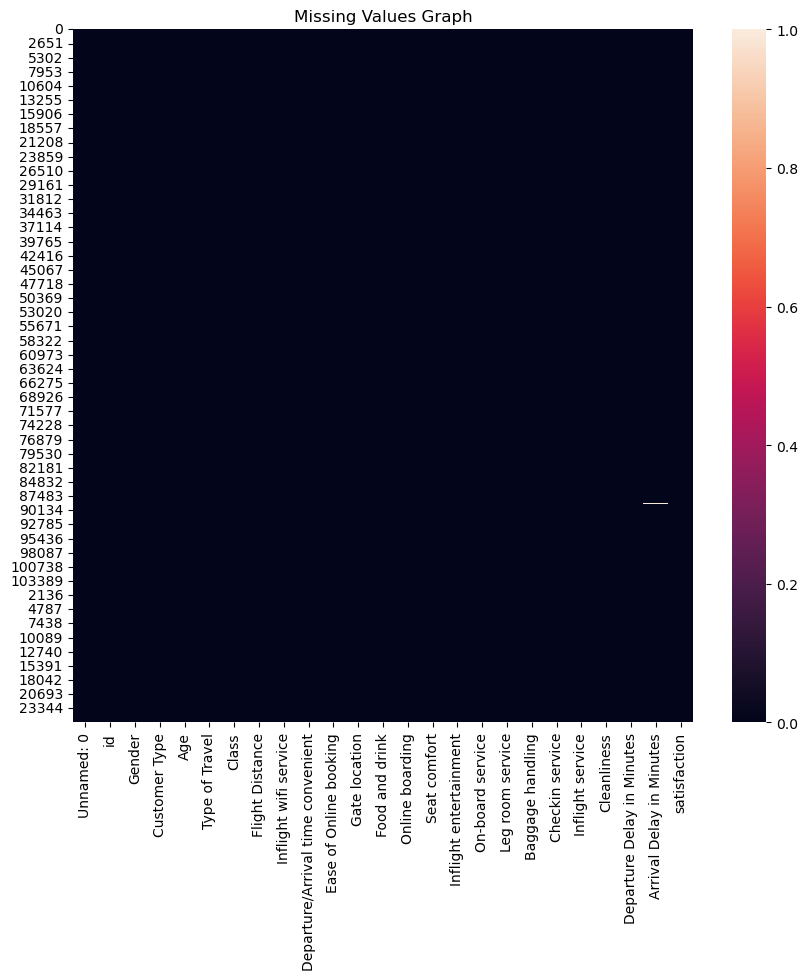

In [22]:
plt.figure(figsize=(10,9))
sns.heatmap(missed_value)
plt.title('Missing Values Graph')
plt.show()

This graph is showing the null values of data. From above it seems that data is quitly well having nothing null values only the column named "Arrival Delay in Minutes" has some null values.

# A) 6
# 2 Graphs for Outliers for Flight Distance

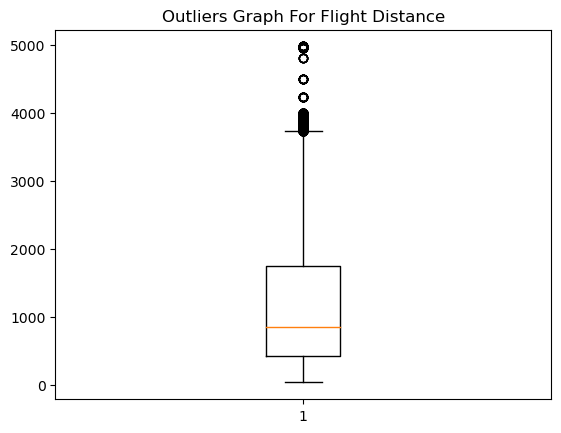

In [23]:
plt.boxplot(data['Flight Distance'])
plt.title('Outliers Graph For Flight Distance')
plt.show()

Above graph is showing the outliers for flight distance. It seems that this features has few outliers.

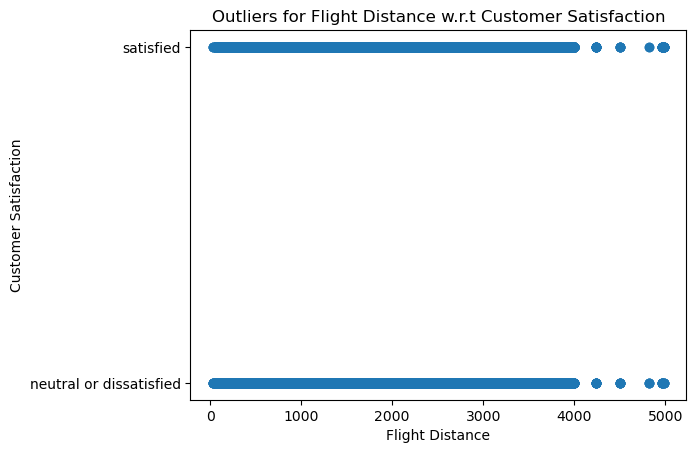

In [24]:
plt.scatter(data['Flight Distance'],data['satisfaction'])
plt.title('Outliers for Flight Distance w.r.t Customer Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Customer Satisfaction')
plt.show()

Above graph is also showing the outlies for flight distance with respect to satisfaction of person. It look flight distance has some of outliers.

# A) 7

# prove or disprove Departure delay in Minutes:

Text(0.5, 1.0, 'Arrival departure delays')

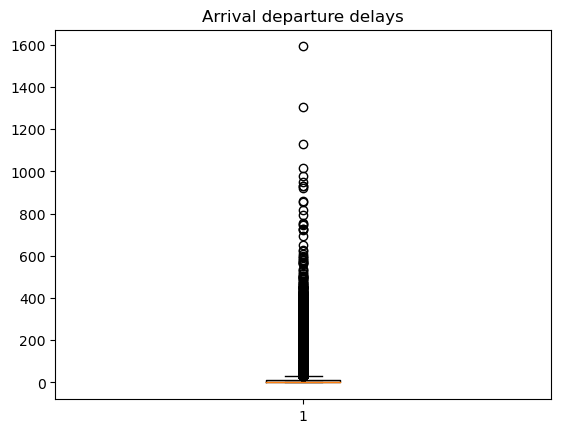

In [25]:
plt.boxplot(data['Departure Delay in Minutes'])
plt.title('Arrival departure delays')

from this above graph it is prove that the departure delay does not prove it causes customers dissatisfaction.

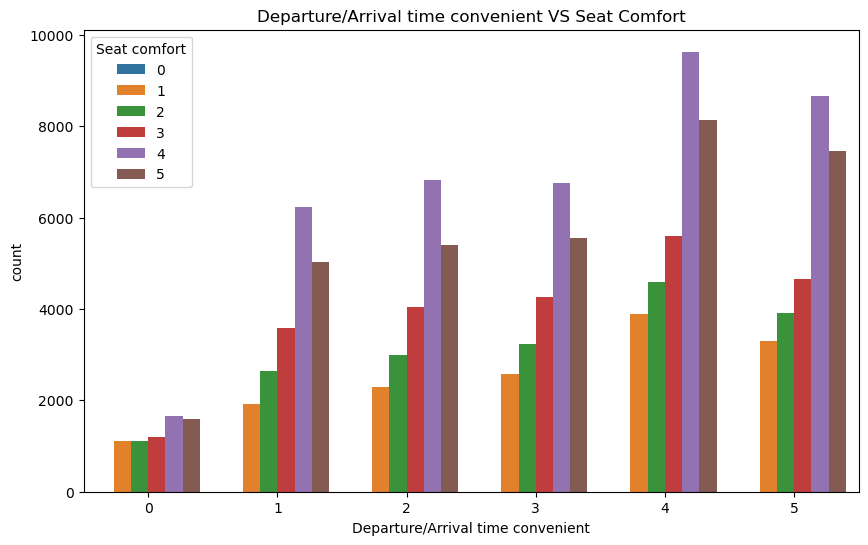

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Departure/Arrival time convenient',data=data,hue='Seat comfort')
plt.title('Departure/Arrival time convenient VS Seat Comfort')
plt.show()

This graph is showing the comfort of passenger for flight with arrival time

# A) 9
# Suggestion of data cleaning steps.

The data in the "Flight Distance" feature has a few outliers, as seen in the boxplot. These outliers could be removed from the dataset.

The "Arrival or Departure Delay in Minutes" feature also has a few extreme outliers, as seen in the boxplot. These outliers could be removed from the dataset.

The "Arrival Delay in Minutes" has null values either to drop this feature or to fill the missing value.

# Remove outliers from features:

In [27]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

# uper and lower bounds:
lower=q1-1.5*iqr
upper=q3-1.5*iqr

# remove outliers:
remove_outlier=data[((data >= lower) & (data <= upper)).all(axis=1)] 

C:\Users\Data Science\AppData\Local\Temp\ipykernel_5140\714858970.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
C:\Users\Data Science\AppData\Local\Temp\ipykernel_5140\714858970.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)
C:\Users\Data Science\AppData\Local\Temp\ipykernel_5140\714858970.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  remove_outlier=data[((data >= lower) & (data <= upper)).all(axis=1)]


In [28]:
data.shape

(129880, 25)

In [29]:
# fill the missing values of null values:
data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

In [30]:
# catergorical columns:
catogrical_column=data.select_dtypes(include='object')
catogrical_column.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [31]:
catogrical_column.nunique()

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64

# Standard Scaler

change catergorical data into numerical for classify model.

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Customer Type']=le.fit_transform(data['Customer Type'])
data['Type of Travel']=le.fit_transform(data['Type of Travel'])
data['Class']=le.fit_transform(data['Class'])
data['satisfaction']=le.fit_transform(data['satisfaction'])

In [33]:
data.tail(5)

Unnamed: 0     id  Gender  Customer Type  Age  Type of Travel  Class  \
25971       25971  78463       1              1   34               0      0   
25972       25972  71167       1              0   23               0      0   
25973       25973  37675       0              0   17               1      1   
25974       25974  90086       1              0   14               0      0   
25975       25975  34799       0              0   42               1      1   

       Flight Distance  Inflight wifi service  \
25971              526                      3   
25972              646                      4   
25973              828                      2   
25974             1127                      3   
25975              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
25971                 5            4                           0   
25972                 5            4                           0   
25973                 4            2                           0   
25974                 5            4                           0   
25975                 1            1                           0   

       Arrival Delay in Minutes  satisfaction  
25971                       0.0             0  
25972                       0.0             1  
25973                       0.0             0  
25974                       0.0             1  
25975                       0.0             0  

[5 rows x 25 columns]

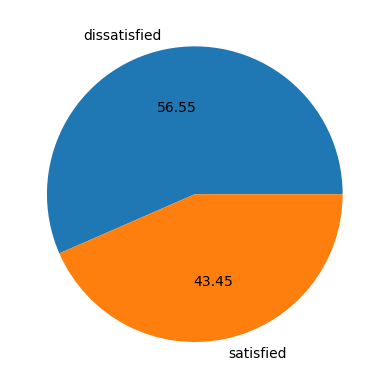

In [34]:
# target column graph
plt.pie(data['satisfaction'].value_counts(),labels=['dissatisfied','satisfied'],autopct='%.2f')
plt.show()

This graph is showing the percentage ratio of satisfied and unsatisfied

In [35]:
# drop some useless features:
data.drop(['Unnamed: 0','id'],axis=1).columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# B)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_dt['Gender']=le.fit_transform(train_dt['Gender'])
train_dt['Customer Type']=le.fit_transform(train_dt['Customer Type'])
train_dt['Type of Travel']=le.fit_transform(train_dt['Type of Travel'])
train_dt['Class']=le.fit_transform(train_dt['Class'])
train_dt['satisfaction']=le.fit_transform(train_dt['satisfaction'])

In [37]:
# fill the missing values in the data 
train_dt['Arrival Delay in Minutes']=train_dt['Arrival Delay in Minutes'].fillna(train_dt['Arrival Delay in Minutes'].mean())
test_dt['Arrival Delay in Minutes']=test_dt['Arrival Delay in Minutes'].fillna(test_dt['Arrival Delay in Minutes'].mean())

# Make a model and train

In [38]:
# drop some useless features:
train_dt.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [39]:
x=train_dt.drop(['satisfaction'],axis=1)
y=train_dt.satisfaction

In [40]:
# split the data into train and testing part
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x,y,test_size=0.2,random_state=40)

In [41]:
print('Shape of x and y training data:', xtrain.shape, ytrain.shape)
print('Shape of x and y testing data:', xtest.shape, ytest.shape)

Shape of x and y training data: (83123, 22) (83123,)
Shape of x and y testing data: (20781, 22) (20781,)


In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [52]:
from sklearn.metrics import classification_report
ypred=dtc.predict(xtest)
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11760
           1       0.94      0.94      0.94      9021

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



# C)

# test model on test data

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_dt['Gender']=le.fit_transform(test_dt['Gender'])
test_dt['Customer Type']=le.fit_transform(test_dt['Customer Type'])
test_dt['Type of Travel']=le.fit_transform(test_dt['Type of Travel'])
test_dt['Class']=le.fit_transform(test_dt['Class'])
test_dt['satisfaction']=le.fit_transform(test_dt['satisfaction'])

In [45]:
# drop some useless features:
test_dt.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [46]:
x=train_dt.drop(['satisfaction'],axis=1)
y=train_dt.satisfaction

In [47]:
# split the data into train and testing part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=40)

In [48]:
# do prediction on test data:
y_pred=dtc.predict(x_test)

In [51]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11760
           1       0.94      0.94      0.94      9021

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



# E)

# Feature Importance for classifier.

In [50]:
feature_imp=pd.DataFrame({'features':x.columns,
                         'importance_score':dtc.feature_importances_})
feature_imp=feature_imp.sort_values(by='importance_score',ascending=False)
print(feature_imp)

                             features  importance_score
11                    Online boarding          0.362787
6               Inflight wifi service          0.176419
3                      Type of Travel          0.147789
13             Inflight entertainment          0.048572
1                       Customer Type          0.036419
17                    Checkin service          0.028786
5                     Flight Distance          0.023180
2                                 Age          0.021061
4                               Class          0.020388
9                       Gate location          0.019826
16                   Baggage handling          0.019336
12                       Seat comfort          0.015746
18                   Inflight service          0.014501
15                   Leg room service          0.011425
19                        Cleanliness          0.011078
14                   On-board service          0.009180
21           Arrival Delay in Minutes          0